# SUPPORT VECTOR MACHINE

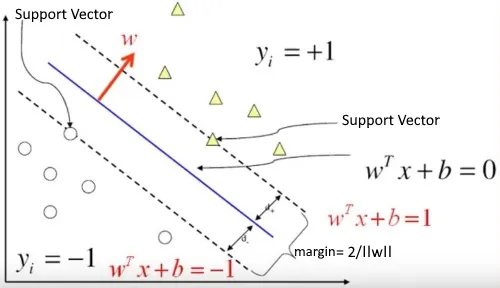

The SVM (Support Vector Machine) is a supervised machine learning algorithm typically used for binary classification problems. It’s trained by feeding a dataset with labeled examples (xᵢ, yᵢ).

 The algorithm finds a hyperplane (or decision boundary) which should ideally have the following properties:

It creates separation between examples of two classes with a maximum margin
Its equation (w.x + b = 0) yields a value ≥ 1 for examples from+ve class and ≤-1 for examples from -ve class

### How does it find this hyperplane? 

By finding the optimal values w* (weights/normal) and b* (intercept) which define this hyperplane. The optimal values are found by minimizing a cost function. Once the algorithm identifies these optimal values, the SVM model f(x) is then defined as shown below:
                
              

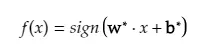

### Cost Function

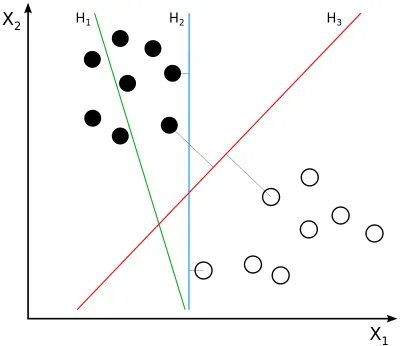

Our objective is to find a hyperplane that separates +ve and -ve examples with the largest margin while keeping the misclassification as low as possible

We will minimize the cost/objective function shown below:

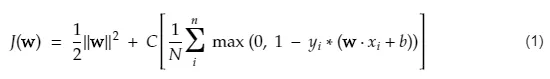

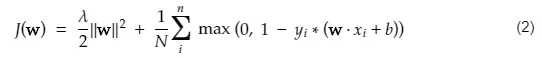

### The Gradient of the Cost Function

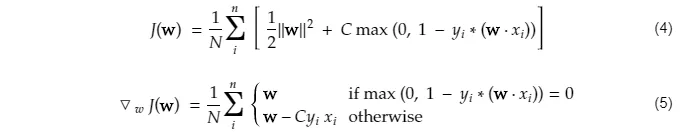

Why do we minimize the cost function? Because the cost function is essentially a measure of how bad our model is doing at achieving the objective. If you look closely at J(w), to find it’s minimum, we have to:

Minimize ∣∣w∣∣² which maximizes margin (2/∣∣w∣∣)
Minimize the sum of hinge loss which minimizes misclassifications.


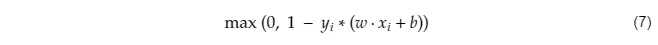

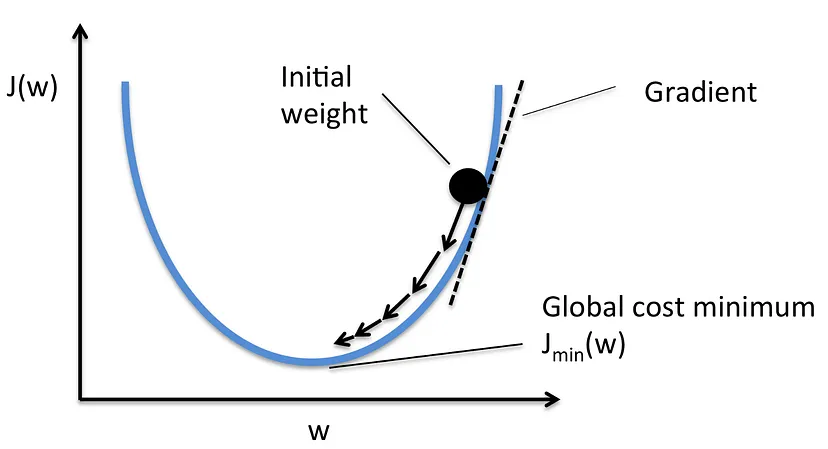

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score ,confusion_matrix,ConfusionMatrixDisplay

# IMPLEMENTING THE MODEL

In [2]:
class SVM:
    def __init__(self, learning_rate=0.0001, lambda_param=0.001, n_iters=10000):
        
        self.weights = None
        self.bias =  None
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        
        
        
    def fit(self,X,y):
        self.m ,self.n = X.shape
        
        y1 = np.where(y <= 0, -1, 1)
        
        self.weights = np.zeros(self.n)
        self.bias = 0
        
        
        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
                
               
                
                if y1[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights - np.dot(x_i, y1[idx]))
                    self.bias -= self.lr * y1[idx]
        
   

    def predict(self, X):
        output = np.dot(X, self.weights) - self.bias
        y_pred=np.sign(output)
        
        y_hat = np.where(y_pred<=-1 , 0,1)
        return y_hat


# READING THE DATA

In [3]:
data = pd.read_csv("C:/Users/gokul/OneDrive/Desktop/machine_learning/projects/dataset.csv")

In [4]:
data.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [5]:
data.shape 

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# DATA PREPROCESSING

### DROPPING UNNECESSARY FEATURES

In [8]:
data.drop(['loan_id','gender','education'],axis=1,inplace=True)

In [9]:
data.head()

,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,no,0,no,5849,0.0,NaN,360.0,1.0,urban,y
1,yes,1,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,yes,0,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,yes,0,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,no,0,no,6000,0.0,141.0,360.0,1.0,urban,y


### CHECK FOR NULL VALUES

In [10]:
data.isnull().sum()

married               3
dependents           15
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

### FILLING NULL VALUES

In [11]:
data.married.unique()

array(['no', 'yes', nan], dtype=object)

In [12]:
data['married'].fillna(data['married'].mode()[0],inplace=True)

In [13]:
data.dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
data['dependents'].fillna(data['dependents'].mode()[0],inplace=True)

In [15]:
data.self_employed.unique()

array(['no', 'yes', nan], dtype=object)

In [16]:
data['self_employed'].fillna(data['self_employed'].mode()[0],inplace=True)

In [17]:
data['loanamount'].fillna(data['loanamount'].mean(),inplace=True)

In [18]:
data.loan_amount_term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
data['loan_amount_term'].fillna(data['loan_amount_term'].mode()[0],inplace=True)

In [20]:
data.credit_history.unique()

array([ 1.,  0., nan])

In [21]:
data['credit_history'].fillna(data['credit_history'].mode()[0],inplace=True)

In [22]:
data.isnull().sum()

married              0
dependents           0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

### CHECK FOR DUPLICATES

In [23]:
data.duplicated().sum()

1

In [24]:
data.drop_duplicates(keep='first',inplace=True)

In [25]:
data.duplicated().sum()

0

In [26]:
data.head()

,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,no,0,no,5849,0.0,146.412162,360.0,1.0,urban,y
1,yes,1,no,4583,1508.0,128.000000,360.0,1.0,rural,n
2,yes,0,yes,3000,0.0,66.000000,360.0,1.0,urban,y
3,yes,0,no,2583,2358.0,120.000000,360.0,1.0,urban,y
4,no,0,no,6000,0.0,141.000000,360.0,1.0,urban,y


## DATA VISUALIZATION

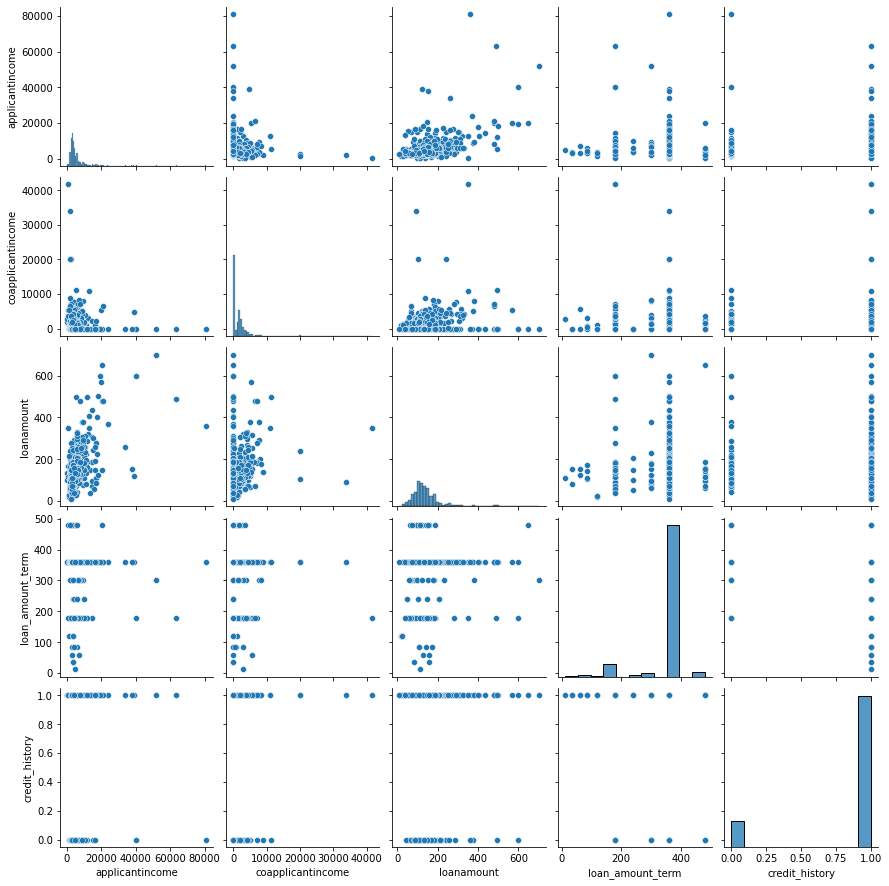

In [27]:
sns.pairplot(data)

# FEATURE EXTRACTION

In [28]:
column=['married','self_employed','property_area','loan_status']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in column:
    data[i] = le.fit_transform(data[i])

In [29]:
data.dependents=data.dependents.replace('3+',3)

<AxesSubplot:>

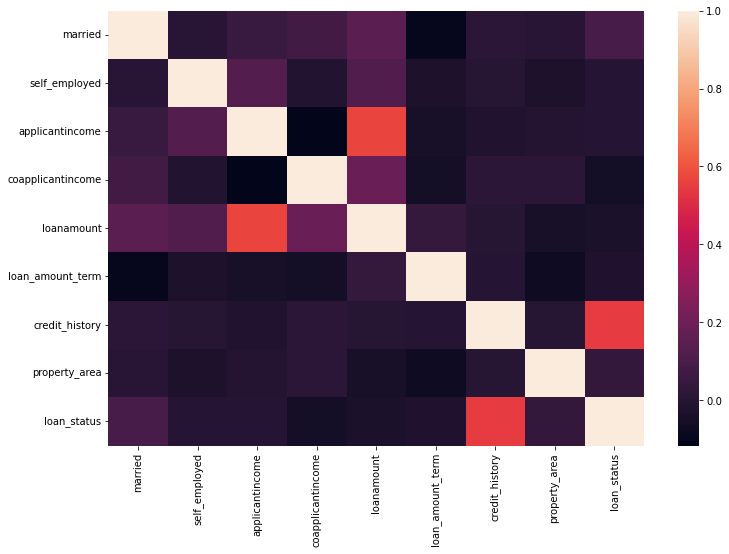

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

# SPLITING THE DATASET

In [31]:
x=data.drop('loan_status',axis=1)
y=data.loan_status

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [33]:
x_test

,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
598,1,0,1,9963,0.0,180.0,360.0,1.0,0
477,1,2,0,2873,1872.0,132.0,360.0,0.0,1
381,0,0,0,5941,4232.0,296.0,360.0,1.0,1
192,1,0,0,6033,0.0,160.0,360.0,1.0,2
374,0,0,0,2764,1459.0,110.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...
245,0,0,1,6050,4333.0,120.0,180.0,1.0,2
15,0,0,0,4950,0.0,125.0,360.0,1.0,2
3,1,0,0,2583,2358.0,120.0,360.0,1.0,2
269,0,1,0,2876,1560.0,90.0,360.0,1.0,2


# FEATURE SCALING

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# MODEL

In [35]:
svm_classifier = SVM()

In [36]:
svm_classifier.fit(x_train,y_train)

In [37]:
y_pred=svm_classifier.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.8130081300813008

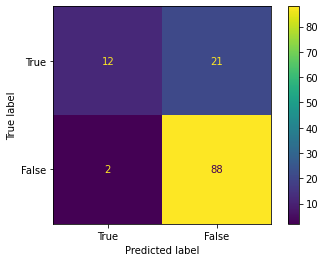

In [39]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=[True,False])
cm.plot()

# SKLEARN MODEL

In [40]:
from sklearn.svm import SVC
svm_c=SVC(kernel='linear',random_state=1)
svm_c.fit(x_train,y_train)
y2 = svm_c.predict(x_test)

In [45]:
y2

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])